In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier



In [2]:
#Capital punishment pre 1974
csv_file_pre = "cleanedICPSRpre1974.csv"
df_pre = pd.read_csv(csv_file_pre)
df_pre.head()

,Unnamed: 0,Race of Offender,Age at Execution,Name of Offender,Place of Execution,Jurisdiction of Exection,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,13063,White,,KENDALL GEORGE,2,6,18,Shot,,,1608,51,95,NaN,James City County,Virginia
1,13064,White,,FRANK DANIELL,2,6,43,Hanging,1,3,1622,51,95,NaN,James City County,Virginia
2,13065,White,,CORNISH RICHARD,2,6,30,Hanging,,,1624,51,95,NaN,James City County,Virginia
3,13066,White,21,HAYLE THOMAS,2,6,2,Hanging,6,,1626,51,95,NaN,James City County,Virginia
4,5796,White,40,BILLINGTON JOHN,2,6,1,Hanging,30,9,1630,25,23,NaN,Whitman town,Massachusetts


In [3]:
#Capital punishment post 1974
csv_file_post = "cleanedICPSRpost1974.csv"
df_post = pd.read_csv(csv_file_post)

In [4]:
csv_file_exec = "executioncodes.csv"
df_exec = pd.read_csv(csv_file_exec)

In [5]:
df_exec.head()

,Unnamed: 0,raw,ICPSR Number,ICPSR Edition Number,ICPSR Part Number,Case Number,Race of Offender,Age at Execution,Name of Offender,Place of Execution,...,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,0,8451410100011 NORMAN ELI 240...,8451,4,1,1000,1,,NORMAN ELI,2,...,01,1,19,12,1812,1,89,NaN,Madison County,Alabama
1,1,8451410100021 WOODS JOHN 464...,8451,4,1,1000,1,,WOODS JOHN,4,...,44,4,06,02,1814,1,0,NaN,York city,Alabama
2,2,8451410100032 GAMARRA CHARLES 221...,8451,4,1,1000,2,,GAMARRA CHARLES,2,...,13,1,19,05,1820,1,97,NaN,Mobile County,Alabama
3,3,8451410100042 DESAYAS VICTORIANO 220...,8451,4,1,1000,2,,DESAYAS VICTORIANO,2,...,01,1,19,05,1820,1,97,NaN,Mobile County,Alabama
4,4,8451410100052 NOREAGO FRANCISCO 220...,8451,4,1,1000,2,,NOREAGO FRANCISCO,2,...,01,1,30,05,1822,1,97,NaN,Mobile County,Alabama


In [6]:
#Clean Dataset for ML
df_pre['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_pre = df_pre[pd.notnull(df_pre['Crimes Committed'])]

df_post['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_post = df_post[pd.notnull(df_post['Crimes Committed'])]

df_exec['Method of Execution'].replace(' ', np.nan, inplace=True)
df_exec = df_exec[pd.notnull(df_exec['Method of Execution'])]
df_exec['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_exec = df_exec[pd.notnull(df_exec['Crimes Committed'])]
df_exec['Race of Offender'].replace(' ', np.nan, inplace=True)
df_exec = df_exec[pd.notnull(df_exec['Race of Offender'])]
df_exec['Place of Execution'].replace(' ', np.nan, inplace=True)
df_exec = df_exec[pd.notnull(df_exec['Place of Execution'])]

In [7]:
#Convert String to Int
df_pre['Crimes Committed'] = df_pre['Crimes Committed'].astype(int)

df_post['Crimes Committed'] = df_post['Crimes Committed'].astype(int)

df_exec['Method of Execution'] = df_exec['Method of Execution'].astype(int)
df_exec['Crimes Committed'] = df_exec['Crimes Committed'].astype(int)
df_exec['Race of Offender'] = df_exec['Race of Offender'].astype(int)
df_exec['Place of Execution'] = df_exec['Place of Execution'].astype(int)

In [8]:
y = df_exec['Method of Execution']
#target_names = ["negative", "positive"]

In [10]:
X = df_exec[['Crimes Committed','Race of Offender','Place of Execution']]
X.head()

,Crimes Committed,Race of Offender,Place of Execution
0,1,1,2
1,44,1,4
2,13,2,2
3,1,2,2
4,1,2,2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.788/0.775
k: 3, Train/Test Score: 0.741/0.734
k: 5, Train/Test Score: 0.802/0.785
k: 7, Train/Test Score: 0.797/0.780
k: 9, Train/Test Score: 0.829/0.824
k: 11, Train/Test Score: 0.828/0.821
k: 13, Train/Test Score: 0.826/0.820
k: 15, Train/Test Score: 0.827/0.821
k: 17, Train/Test Score: 0.826/0.821
k: 19, Train/Test Score: 0.829/0.822


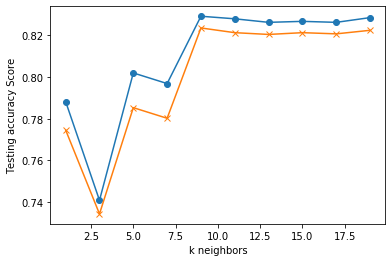

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()